# Finding forever homes: Predicting animal shelter outcomes

## Abstract

What determines whether or not an animal gets adopted?  Does their breed or coat color matter?  If they have a name? The time of the year?  Do determinants vary between cats and dogs? For this project, I will be constructing Random Forest and Support Vector Machine models that attempt to predict animal shelter outcomes.

### Data
I will be using data from the Austin Animal Center, the largest no-kill animal shelter in the United States.  This dataset contains animal shelter outcomes on 78,255 animals, among them 44,242 dogs and 29,422 cats.  Along with the adoption end outcome, the datset tracks animal transfers, deaths, euthanasia, returns to their owners, and others.

### Questions
I will be attempting to answer the following questions.
- What features are the best determinants for animal shelter outcomes?
- What features are the best determinants for whether or not the animal is adopted?
- Do those features differ between cats and dogs?

### Models
I will be using Random Forest and SVM


## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Random Forest
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Confusion matrix
from sklearn.metrics import confusion_matrix

# Support Vector Machine
from sklearn.svm import SVC

# Label Encoder
from sklearn.preprocessing import LabelEncoder

#Stylings
sns.set(style="white", color_codes=True)

## Uploading and describing data

In [2]:
raw_data = pd.read_csv('datafiles/aac_shelter_outcomes.csv')
raw_data.head(20)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male
6,1 year,A693700,Other,Squirrel Mix,Tan,2013-12-13T00:00:00,2014-12-13T12:20:00,2014-12-13T12:20:00,NaN,Suffering,Euthanasia,Unknown
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08T15:55:00,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14T18:45:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26T00:00:00,2014-06-29T17:45:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
age_upon_outcome    78248 non-null object
animal_id           78256 non-null object
animal_type         78256 non-null object
breed               78256 non-null object
color               78256 non-null object
date_of_birth       78256 non-null object
datetime            78256 non-null object
monthyear           78256 non-null object
name                54370 non-null object
outcome_subtype     35963 non-null object
outcome_type        78244 non-null object
sex_upon_outcome    78254 non-null object
dtypes: object(12)
memory usage: 7.2+ MB


In [4]:
raw_data.nunique()

age_upon_outcome       46
animal_id           70855
animal_type             5
breed                2128
color                 525
date_of_birth        5869
datetime            64361
monthyear           64361
name                14574
outcome_subtype        19
outcome_type            9
sex_upon_outcome        5
dtype: int64

## Exploratory Data Analysis

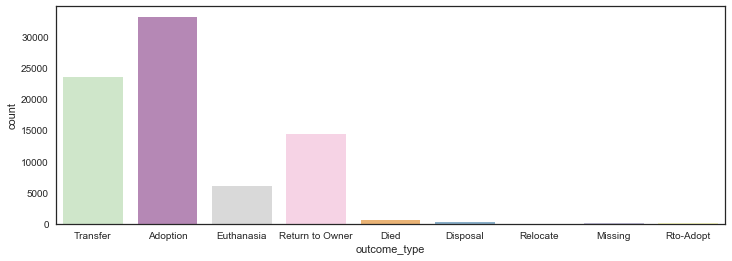

In [5]:
plt.figure(figsize=(12,4))
sns.countplot(x='outcome_type', data=raw_data, palette='Set3_r')

Hooray! Adoption is the most common outcome at this shelter, followed by Transfer and Return to Owner. Since some categories are very rare (Died, Disposal, Relocate, Missing, Rto-Adopt), there is a class imbalance issue.  Thus, it may be difficult to predict these rarer outcomes.  That is something to consider in the modeling.

Let's look at the outcome subtypes.

In [6]:
raw_data.groupby(['outcome_type','outcome_subtype']).size()

outcome_type  outcome_subtype    
Adoption      Barn                       1
              Foster                  5558
              Offsite                  367
Died          At Vet                    33
              Enroute                   45
              In Foster                164
              In Kennel                335
              In Surgery                16
Euthanasia    Aggressive               506
              At Vet                    26
              Behavior                 142
              Court/Investigation       18
              Medical                  259
              Rabies Risk             2417
              Suffering               2514
              Underage                  28
Missing       In Foster                 18
              In Kennel                  8
              Possible Theft             9
Transfer      Barn                       2
              Partner                19660
              SCRP                    3211
              Snr   

We can see that each outcome is broken out into subtypes.  It should be noted that Adoptions with the subtype NA is not included in the above description.  

SCRP is Austin Animal Shelter's Stray Cat Release program. This is similar to TNR, in that stray cats and spayed/neutered and returned to their environment.  You can find more information on this service [here](http://www.maddiesfund.org/austin-animal-services-stray-cat-return-program.htm).


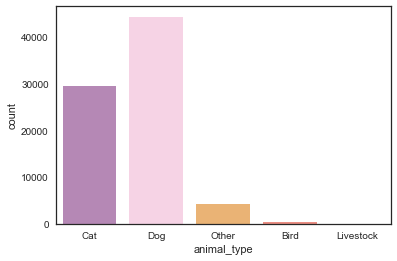

In [8]:
sns.countplot(x='animal_type', data=raw_data, palette='Set3_r')

Most of the animals in the dataset are either cats or dogs.  

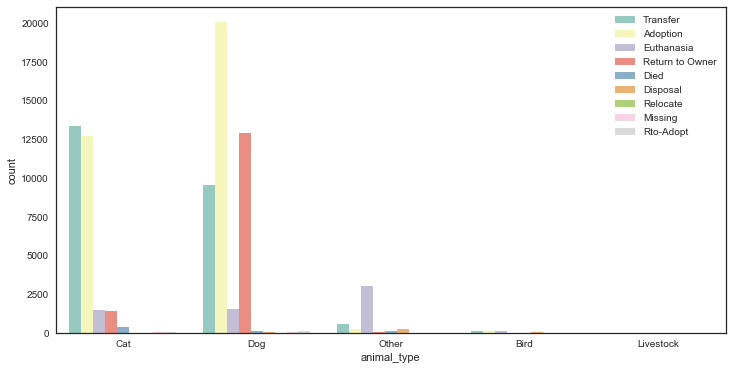

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=raw_data,
              x='animal_type',
              hue='outcome_type',
              palette='Set3')
plt.legend(loc='upper right')
plt.show()

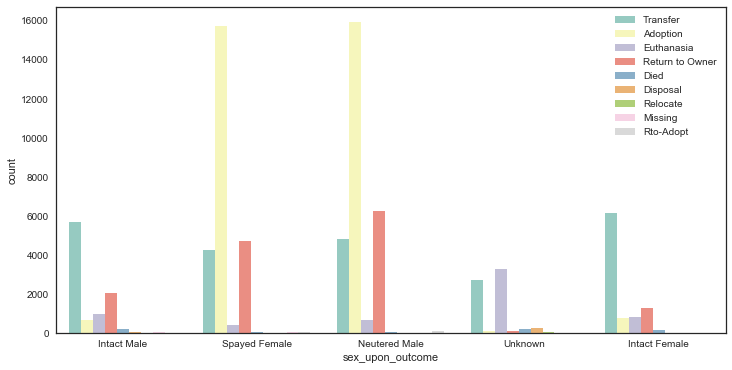

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=raw_data,
              x='sex_upon_outcome',
              hue='outcome_type',
              palette='Set3')
plt.legend(loc='upper right')
plt.show()

## Feature Engineering

1. Name: Name vs no name
2. Sex: M vs F vs unknown
3. Intact: Intact vs not vs unknown
4. Age in days
5. Kitten/Puppy vs adult
5. Color
6. Breed
7. Mix vs no mix
8. Month 
9. Time of year

### Data cleaning

There are 12 entries that do not have an outcome type.  Since that is the basis of what we are interested in, I am going to remove these rows.

In [12]:
raw_data.outcome_type.isnull().sum()

12

In [13]:
raw_data = raw_data[pd.notnull(raw_data['outcome_type'])]

### Adoption Outcome - Binary
I want to create an outcome feature that just captures whether or not an animal gets adopted. 
Who gts adopted quickly?

In [14]:
raw_data['adopt_bi'] = np.where(raw_data['outcome_type'] == 'Adoption', 1, 0)

### Name

Does naming an animal increase its chances of getting adopted?  To assess this, I am creating feature in which animals are categorized as with or without names. 

In [15]:
raw_data['name_bi'] = np.where(raw_data['name'].isnull(), 0, 1)

### Sex and Intact

The raw data has the animals "intactness" and its sex in one category.  It may be helpful to split it into two for our model.

In [16]:
raw_data.sex_upon_outcome.value_counts()

Neutered Male    27783
Spayed Female    25203
Intact Male       9547
Intact Female     9140
Unknown           6570
Name: sex_upon_outcome, dtype: int64

In [17]:
raw_data.sex_upon_outcome.isnull().sum()

1

There is a pretty significant amount of animals with unknown sexes.  Too many entries to just remove them outright.  I believe the best option is create an unknown category within Sex and Intact.  There are also two rows with null values.  We will assign these as unknown.

In [18]:
# Assigning null value as Unknown
raw_data['sex_upon_outcome'].fillna('Unknown', inplace=True)

In [19]:
raw_data['male'] = raw_data['sex_upon_outcome'].apply(lambda x: 1 if 'Male' in x else 2 if 'Unknown' in x else 0)

In [20]:
raw_data['intact'] = raw_data['sex_upon_outcome'].apply(lambda x: 1 if 'Intact' in x else 2 if 'Unknown' in x else 0)

### Age in Days, Years
Currently, age_upon_outcome is listed as a string.  I would like to convert this into days so we can plug it.  We can do this by spliting the string by the number and the time period and multiplying it by the correct factor to get the number in days.

In [21]:
raw_data.age_upon_outcome.isnull().sum()

6

There are 8 nulls in the age_upon_outcome column.  This is a relatively small number of missing data points, so we will fill in the nulls with the most common value

In [22]:
raw_data['age_upon_outcome'].fillna(raw_data['age_upon_outcome'].value_counts().index[0], inplace=True)

Alright, now we can split the string and convert it into days!

In [23]:
# Spliting the string and storing it into different columns
raw_data['number'] = raw_data['age_upon_outcome'].str.split(' ').str[0].astype(int)
raw_data['time_period'] = raw_data['age_upon_outcome'].str.split(' ').str[1]

In [24]:
raw_data['time_period'] = np.where(raw_data['time_period'].str.contains('day'), 1, 
                                   np.where(raw_data['time_period'].str.contains('week'), 7, 
                                            np.where(raw_data['time_period'].str.contains('month'), 30, 
                                                     np.where(raw_data['time_period'].str.contains('year'), 365, 0)))).astype(int)


In [25]:
# Now, multply to get the age in days and years!

raw_data['outcome_age_days'] = raw_data['number'] * raw_data['time_period']
raw_data['outcome_age_years'] = (raw_data['outcome_age_days'] / 365).round(5)

In [26]:
raw_data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,adopt_bi,name_bi,male,intact,number,time_period,outcome_age_days,outcome_age_years
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,0,0,1,1,2,7,14,0.03836
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,0,1,0,0,1,365,365,1.00000
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,1,1,0,1,365,365,1.00000
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,0,1,1,0,9,365,3285,9.00000
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,0,0,2,2,5,30,150,0.41096


### Outcome times
I have a theory that adoptions are more likely to happen in certain times of the year and maybe even certain times of the week. I need to build additional features for these.

In [27]:
# Converting 'datetime' column into readable date and times.
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'])

# Extracting month and year data.
raw_data['outcome_month'] = raw_data['datetime'].dt.month
raw_data['outcome_year'] = raw_data['datetime'].dt.year
raw_data['outcome_weekday'] = raw_data['datetime'].dt.weekday_name

# Adding additional season column
raw_data['outcome_season'] = np.where(raw_data['outcome_month'].between(3,5, inclusive=True), 'spring',
                                      np.where(raw_data['outcome_month'].between(6,8, inclusive=True), 'summer',
                                               np.where(raw_data['outcome_month'].between(9,11, inclusive=True), 'fall',
                                                        np.where(raw_data['outcome_month'].between(3,4, inclusive=True), 'spring','winter'))))

In [28]:
raw_data['outcome_year'].value_counts()

2014    18705
2015    18506
2016    17668
2017    17654
2013     4505
2018     1206
Name: outcome_year, dtype: int64

Looks like we have incomplete data for 2013 and 2018.  2013 could be when the shelter transferred information into a digital format.  2018 is still ongoing.

In [29]:
raw_data['outcome_weekday'].value_counts()

Saturday     12579
Sunday       12162
Tuesday      11456
Monday       11222
Friday       10480
Wednesday    10295
Thursday     10050
Name: outcome_weekday, dtype: int64

### Life Stage
It is common knowledge that kittens and puppies are more likely to get adopted than adult cats and dogs, and senior dogs and cats are less likely to be adopted.  It may be useful to include a feature that distinguishes the animals by life stage.

In [30]:
# We are only considering cats and dogs here, so let's separate these two animal types 
#  into separate dataframes.  This will also be helpful when tackling the breed and color features.
cat_df = raw_data[raw_data['animal_type'] == 'Cat']
dog_df = raw_data[raw_data['animal_type'] == 'Dog']

In [31]:
# Kittens and puppies become adults at around 6 months, or 180 days.
cat_df['baby'] = np.where(cat_df['outcome_age_days'] < 180, 1, 0)
dog_df['baby'] = np.where(dog_df['outcome_age_days'] < 180, 1, 0)

# Cats and dogs generally become seniors at around 7 years.
cat_df['senior'] = np.where(cat_df['outcome_age_years'] >= 7, 1, 0)
dog_df['senior'] = np.where(dog_df['outcome_age_years'] >= 7, 1, 0)


In [32]:
cat_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,number,time_period,outcome_age_days,outcome_age_years,outcome_month,outcome_year,outcome_weekday,outcome_season,baby,senior
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,2,7,14,0.03836,7,2014,Tuesday,summer,1,0
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,1,30,30,0.08219,8,2014,Thursday,summer,1,0
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26T00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,3,30,90,0.24658,6,2014,Sunday,summer,1,0
10,1 year,A675405,Cat,Domestic Medium Hair Mix,Black/White,2013-03-27T00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,1,365,365,1.00000,3,2014,Friday,spring,0,0
17,3 weeks,A670420,Cat,Domestic Shorthair Mix,Black/White,2013-12-16T00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,3,7,21,0.05753,1,2014,Thursday,winter,1,0


In [33]:
dog_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,number,time_period,outcome_age_days,outcome_age_years,outcome_month,outcome_year,outcome_weekday,outcome_season,baby,senior
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,...,1,365,365,1.00000,11,2013,Thursday,fall,0,0
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,...,1,365,365,1.00000,6,2014,Tuesday,summer,0,0
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15 15:50:00,2014-06-15T15:50:00,Monday,Partner,...,9,365,3285,9.00000,6,2014,Sunday,summer,0,1
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07 13:06:00,2013-10-07T13:06:00,*Edgar,Partner,...,4,30,120,0.32877,10,2013,Monday,fall,1,0
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08 15:55:00,2014-12-08T15:55:00,*Ella,Partner,...,3,365,1095,3.00000,12,2014,Monday,winter,0,0


In [34]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44238 entries, 1 to 78255
Data columns (total 26 columns):
age_upon_outcome     44238 non-null object
animal_id            44238 non-null object
animal_type          44238 non-null object
breed                44238 non-null object
color                44238 non-null object
date_of_birth        44238 non-null object
datetime             44238 non-null datetime64[ns]
monthyear            44238 non-null object
name                 37182 non-null object
outcome_subtype      13575 non-null object
outcome_type         44238 non-null object
sex_upon_outcome     44238 non-null object
adopt_bi             44238 non-null int64
name_bi              44238 non-null int64
male                 44238 non-null int64
intact               44238 non-null int64
number               44238 non-null int64
time_period          44238 non-null int64
outcome_age_days     44238 non-null int64
outcome_age_years    44238 non-null float64
outcome_month        44238 no

### Breed

#### Cats
Cat breeds are a little less complicated than dog breeds, so lets start there.
Inspiration on how to create the breed and color features can be found here: https://aaronschlegel.me/extraction-feature-engineering-aac-data-requests-pandas.html

In [35]:
cat_df.breed.value_counts()

Domestic Shorthair Mix                     23332
Domestic Medium Hair Mix                    2323
Domestic Longhair Mix                       1228
Siamese Mix                                  998
Domestic Shorthair                           386
American Shorthair Mix                       211
Snowshoe Mix                                 148
Domestic Medium Hair                         131
Maine Coon Mix                               106
Manx Mix                                      79
Russian Blue Mix                              65
Siamese                                       60
Domestic Longhair                             45
Himalayan Mix                                 32
Ragdoll Mix                                   22
Persian Mix                                   20
Siamese/Domestic Shorthair                    13
Angora Mix                                    12
Bengal Mix                                    12
American Curl Shorthair Mix                   11
Maine Coon          

In [36]:
cat_df['breed'] = cat_df['breed'].str.lower()

In [37]:
cat_df['mix'] = np.where(cat_df['breed'].str.contains("mix"), 1, 0)

In [38]:
# Dropping "mix", replacing "medium hair" with "mediumhair" for consistency, and lower-casing.

cat_df['breed_edit'] = cat_df['breed'].str.replace('mix', '').str.replace('medium hair', 'mediumhair').str.strip()       

According to the [Cat Fancier Association](http://cfa.org/Breeds.aspx), there are 42 cat breeds.  We will use these to recategorize our cat breeds.

In [39]:
cfa_breeds = ['Abyssinian', 'American Bobtail', 'American Curl', 'American Shorthair', 'American Wirehair', 
              'Balinese', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Burmese', 'Burmilla', 
              'Chartreux', 'Colorpoint Shorthair', 'Cornish Rex', 'Devon Rex', 'Egyptian Mau', 'European Burmese', 
              'Exotic', 'Havana Brown', 'Japanese Bobtail', 'Korat', 'LaPerm', 'Maine Coon', 'Manx', 
              'Norwegian Forest Cat', 'Ocicat', 'Oriental', 'Persian', 'Ragamuffin', 'Ragdoll', 'Russian Blue', 
              'Scottish Fold', 'Selkirk Rex', 'Siamese', 'Siberian', 'Singapura', 'Somali', 'Tonkinese', 
              'Turkish Angora', 'Turkish Van']

cfa_breeds = [i.lower() for i in cfa_breeds]
cfa_breeds = '|'.join(cfa_breeds)

cfa_breeds

'abyssinian|american bobtail|american curl|american shorthair|american wirehair|balinese|bengal|birman|bombay|british shorthair|burmese|burmilla|chartreux|colorpoint shorthair|cornish rex|devon rex|egyptian mau|european burmese|exotic|havana brown|japanese bobtail|korat|laperm|maine coon|manx|norwegian forest cat|ocicat|oriental|persian|ragamuffin|ragdoll|russian blue|scottish fold|selkirk rex|siamese|siberian|singapura|somali|tonkinese|turkish angora|turkish van'

Since some cats have two breeds, we will create a breed1 and breed2 column.
We will then distinguish whether the cat is a cfa recongized breed or domestic in separate features.  CFA breeds will hold precedence over the domestic breeds. (e.g. A Siamese/domestic shorthair will categorized as a cfa breed.)

In [40]:
# Splitting records with two breeds into two columns for each breed.
cat_df = pd.concat([cat_df, 
                     cat_df['breed_edit'].str.split('/', expand=True).rename(columns={0:'breed1', 1:'breed2'})], 
                    axis=1)

# If the columns is in the cfa list, mark as 1.
cat_df['cfa_breed'] = np.where((cat_df['breed1'].str.contains(cfa_breeds)) | 
                                (cat_df['breed2'].str.contains(cfa_breeds)), 
                                1, 0)

# If neither breed1 or breed2 columns contain a cfa recognized breed, mark as domestic.
cat_df['domestic_breed'] = np.where((cat_df['breed1'].str.contains(cfa_breeds) == False) | 
                                     (cat_df['breed2'].str.contains(cfa_breeds) == False), 
                                     1, 0)

In [41]:
cat_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_season,baby,senior,mix,breed_edit,breed1,breed2,cfa_breed,domestic_breed
0,2 weeks,A684346,Cat,domestic shorthair mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,summer,1,0,1,domestic shorthair,domestic shorthair,None,0,1
8,1 month,A685067,Cat,domestic shorthair mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,summer,1,0,1,domestic shorthair,domestic shorthair,None,0,1
9,3 months,A678580,Cat,domestic shorthair mix,White/Black,2014-03-26T00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,summer,1,0,1,domestic shorthair,domestic shorthair,None,0,1
10,1 year,A675405,Cat,domestic medium hair mix,Black/White,2013-03-27T00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,spring,0,0,1,domestic mediumhair,domestic mediumhair,None,0,1
17,3 weeks,A670420,Cat,domestic shorthair mix,Black/White,2013-12-16T00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,winter,1,0,1,domestic shorthair,domestic shorthair,None,0,1


#### Dogs
There are a lot more dog breeds than cat breeds.  339 dog breeds, to be exact.  It may be helpful to categorize whether or not the dog is a mix, along with the different breeds. 

In [42]:
dog_df.breed.value_counts()

Pit Bull Mix                                  6133
Chihuahua Shorthair Mix                       4733
Labrador Retriever Mix                        4607
German Shepherd Mix                           1892
Australian Cattle Dog Mix                     1059
Dachshund Mix                                  798
Boxer Mix                                      674
Miniature Poodle Mix                           648
Border Collie Mix                              646
Catahoula Mix                                  476
Rat Terrier Mix                                456
Australian Shepherd Mix                        454
Yorkshire Terrier Mix                          437
Siberian Husky Mix                             418
Jack Russell Terrier Mix                       416
Miniature Schnauzer Mix                        392
Beagle Mix                                     384
Chihuahua Longhair Mix                         358
Staffordshire Mix                              350
Great Pyrenees Mix             

In [43]:
# Lower-casing
dog_df['breed'] = dog_df['breed'].str.lower()

In [44]:
dog_df['mix'] = np.where(dog_df['breed'].str.contains("mix"), 1, 0)

In [45]:
# Dropping "mix" and stripping whitespace.

dog_df['breed_edit'] = dog_df['breed'].str.replace('mix', '').str.strip()  

# Splitting records with two breeds into two columns for each breed.
dog_df = pd.concat([dog_df, 
                     dog_df['breed_edit'].str.split('/', expand=True).rename(columns={0:'breed1', 1:'breed2'})], 
                    axis=1)

In [46]:
dog_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_year,outcome_weekday,outcome_season,baby,senior,mix,breed_edit,breed1,breed2,2
1,1 year,A666430,Dog,beagle mix,White/Brown,2012-11-06T00:00:00,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,...,2013,Thursday,fall,0,0,1,beagle,beagle,None,None
2,1 year,A675708,Dog,pit bull,Blue/White,2013-03-31T00:00:00,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,...,2014,Tuesday,summer,0,0,0,pit bull,pit bull,None,None
3,9 years,A680386,Dog,miniature schnauzer mix,White,2005-06-02T00:00:00,2014-06-15 15:50:00,2014-06-15T15:50:00,Monday,Partner,...,2014,Sunday,summer,0,1,1,miniature schnauzer,miniature schnauzer,None,None
5,4 months,A664462,Dog,leonberger mix,Brown/White,2013-06-03T00:00:00,2013-10-07 13:06:00,2013-10-07T13:06:00,*Edgar,Partner,...,2013,Monday,fall,1,0,1,leonberger,leonberger,None,None
7,3 years,A692618,Dog,chihuahua shorthair mix,Brown,2011-11-23T00:00:00,2014-12-08 15:55:00,2014-12-08T15:55:00,*Ella,Partner,...,2014,Monday,winter,0,0,1,chihuahua shorthair,chihuahua shorthair,None,None


Whoops, looks like some dogs have three breeds listed, which is why we have an extra '2' column.  Let's see how many dogs have three breeds.

In [47]:
dog_df[2].notnull().sum()

20

Only 20 dogs out of 44,238 have more than three breeds listed.  Since there is not that much information captured in this column, I'm going to go ahead and drop it.

In [48]:
dog_df.drop(2, axis=1, inplace=True)

In [49]:
dog_df.breed1.value_counts()

pit bull                        6736
labrador retriever              6052
chihuahua shorthair             5615
german shepherd                 2527
australian cattle dog           1400
dachshund                       1217
boxer                            934
border collie                    902
miniature poodle                 823
catahoula                        630
beagle                           625
siberian husky                   615
jack russell terrier             605
yorkshire terrier                605
australian shepherd              604
rat terrier                      582
miniature schnauzer              568
great pyrenees                   491
rottweiler                       487
shih tzu                         449
pointer                          435
chihuahua longhair               431
cairn terrier                    417
staffordshire                    390
american bulldog                 378
anatol shepherd                  340
plott hound                      303
a

In [50]:
dog_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_month,outcome_year,outcome_weekday,outcome_season,baby,senior,mix,breed_edit,breed1,breed2
1,1 year,A666430,Dog,beagle mix,White/Brown,2012-11-06T00:00:00,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,...,11,2013,Thursday,fall,0,0,1,beagle,beagle,None
2,1 year,A675708,Dog,pit bull,Blue/White,2013-03-31T00:00:00,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,...,6,2014,Tuesday,summer,0,0,0,pit bull,pit bull,None
3,9 years,A680386,Dog,miniature schnauzer mix,White,2005-06-02T00:00:00,2014-06-15 15:50:00,2014-06-15T15:50:00,Monday,Partner,...,6,2014,Sunday,summer,0,1,1,miniature schnauzer,miniature schnauzer,None
5,4 months,A664462,Dog,leonberger mix,Brown/White,2013-06-03T00:00:00,2013-10-07 13:06:00,2013-10-07T13:06:00,*Edgar,Partner,...,10,2013,Monday,fall,1,0,1,leonberger,leonberger,None
7,3 years,A692618,Dog,chihuahua shorthair mix,Brown,2011-11-23T00:00:00,2014-12-08 15:55:00,2014-12-08T15:55:00,*Ella,Partner,...,12,2014,Monday,winter,0,0,1,chihuahua shorthair,chihuahua shorthair,None


### Color

#### Cats
There are 231 combinations of colors and coat patterns.  There are sometimes two given colors, much like the breeds.  So we can handle color in similar ways.

In [51]:
cat_df.color.value_counts()

Brown Tabby                 4445
Black                       3846
Black/White                 2804
Brown Tabby/White           2338
Orange Tabby                2180
Tortie                      1335
Calico                      1318
Blue Tabby                  1130
Orange Tabby/White          1095
Blue                        1057
Torbie                       845
Blue/White                   792
Blue Tabby/White             545
White/Black                  508
Cream Tabby                  498
Lynx Point                   439
White                        334
Seal Point                   321
White/Brown Tabby            287
Cream Tabby/White            236
Flame Point                  200
White/Blue                   196
Black Tabby                  177
Torbie/White                 175
Gray Tabby                   132
Black Smoke                  104
White/Orange Tabby           101
Lilac Point                   77
Tortie Point                  75
Gray                          74
          

There are coat patterns along with coat color in the data.  Let's pull this out in a separate column using a regex string and str.extract.

Inspiration for this method can be found here: https://aaronschlegel.me/extraction-feature-engineering-aac-data-requests-pandas.html

In [52]:
# Coat patterns for cats
coat_patterns = ['tabby', 'tortie', 'tortoiseshell', 'calico', 'smoke', 'torbie',
                 'colorpoint', 'point', 'brindle', 'agouti', 'bicolor', 'tricolor']

In [53]:
# Create the regex string by joining the coat patterns with | and encapsulating them in parantheses
coat_reg = '(' + '|'.join(coat_patterns) + ')'

coat_reg

'(tabby|tortie|tortoiseshell|calico|smoke|torbie|colorpoint|point|brindle|agouti|bicolor|tricolor)'

In [54]:
# Extracting coat pattern from color and removing it from color column
cat_df['color'] = cat_df['color'].str.lower()

cat_df['coat_pattern'] = cat_df['color'].str.extract(coat_reg, expand=False)

cat_df['color_edit'] = cat_df['color'].str.replace(coat_reg, '').str.strip()

Now we can split the cats with two colors into two color columns.
With coat patterns extracted, those without a listed color and only a listed coat pattern will be missing color data.  These now blank values signify breed-specific colors, so we can relabel them as such by searching for blanks in the color1 column and replacing it with 'breed specific'.

In [55]:
#Splitting color column into two color columns
cat_df = pd.concat([cat_df, 
                     cat_df['color_edit'].str.split('/', expand=True).rename(columns={0:'color1', 1:'color2'})], axis=1)

#Replacing blanks in color1 with 'breed specific'.
cat_df['color1'] = np.where(cat_df['color1'] == '', 'breed specific', cat_df['color1'])

# Creating a column that collects the extracted coat colors and patterns.  If the color is breed specific, list 
# the coat pattern.  Otherwise, list the color.
cat_df['coat'] = np.where(cat_df['color1'] == 'breed specific', cat_df['coat_pattern'], cat_df['color1'])

In [56]:
cat_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,breed_edit,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color_edit,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair mix,orange tabby,2014-07-07T00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,domestic shorthair,domestic shorthair,None,0,1,tabby,orange,orange,None,orange
8,1 month,A685067,Cat,domestic shorthair mix,blue tabby/white,2014-06-16T00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,domestic shorthair,domestic shorthair,None,0,1,tabby,blue /white,blue,white,blue
9,3 months,A678580,Cat,domestic shorthair mix,white/black,2014-03-26T00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,domestic shorthair,domestic shorthair,None,0,1,NaN,white/black,white,black,white
10,1 year,A675405,Cat,domestic medium hair mix,black/white,2013-03-27T00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,domestic mediumhair,domestic mediumhair,None,0,1,NaN,black/white,black,white,black
17,3 weeks,A670420,Cat,domestic shorthair mix,black/white,2013-12-16T00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,domestic shorthair,domestic shorthair,None,0,1,NaN,black/white,black,white,black


#### Dogs
Now for the dogs.  The dogs have 336 combinations of colors and coat patters.  We can treat it a similar way as we did for the cats.

In [57]:
dog_df.color.value_counts()

Black/White                    5085
Black                          2479
Brown/White                    2392
Tan/White                      2382
White                          2313
Tan                            1940
Tricolor                       1923
Black/Tan                      1828
Brown                          1807
White/Brown                    1501
White/Black                    1497
Black/Brown                    1372
Brown Brindle/White            1353
Blue/White                     1276
White/Tan                      1132
Brown/Black                     998
Red                             887
Red/White                       856
Brown Brindle                   711
Tan/Black                       602
Chocolate/White                 587
Yellow                          494
Sable                           442
Cream                           394
Chocolate                       392
Buff                            375
Fawn/White                      319
White/Brown Brindle         

In [58]:
# Coat patterns for dogs
coat_patterns = ['bicolor','tricolor','merle','tuxedo','harlequin','spotted','tick','brindle','saddle',
                'sable']

# Create the regex string by joining the coat patterns with | and encapsulating them in parantheses
coat_reg = '(' + '|'.join(coat_patterns) + ')'

coat_reg

'(bicolor|tricolor|merle|tuxedo|harlequin|spotted|tick|brindle|saddle|sable)'

In [59]:
# Extracting coat pattern from color and removing it from color column
dog_df['color'] = dog_df['color'].str.lower()

dog_df['coat_pattern'] = dog_df['color'].str.extract(coat_reg, expand=False)

dog_df['color_edit'] = dog_df['color'].str.replace(coat_reg, '').str.strip()

In [60]:
#Splitting color column into two color columns
dog_df = pd.concat([dog_df, 
                     dog_df['color_edit'].str.split('/', expand=True).rename(columns={0:'color1', 1:'color2'})], axis=1)

#Replacing blanks in color1 with 'breed specific'.
dog_df['color1'] = np.where(dog_df['color1'] == '', 'breed specific', dog_df['color1'])

# Creating a column that collects the extracted coat colors and patterns.  If the color is breed specific, list 
# the coat pattern.  Otherwise, list the color.
dog_df['coat'] = np.where(dog_df['color1'] == 'breed specific', dog_df['coat_pattern'], dog_df['color1'])

In [61]:
dog_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,senior,mix,breed_edit,breed1,breed2,coat_pattern,color_edit,color1,color2,coat
1,1 year,A666430,Dog,beagle mix,white/brown,2012-11-06T00:00:00,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,...,0,1,beagle,beagle,None,NaN,white/brown,white,brown,white
2,1 year,A675708,Dog,pit bull,blue/white,2013-03-31T00:00:00,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,...,0,0,pit bull,pit bull,None,NaN,blue/white,blue,white,blue
3,9 years,A680386,Dog,miniature schnauzer mix,white,2005-06-02T00:00:00,2014-06-15 15:50:00,2014-06-15T15:50:00,Monday,Partner,...,1,1,miniature schnauzer,miniature schnauzer,None,NaN,white,white,None,white
5,4 months,A664462,Dog,leonberger mix,brown/white,2013-06-03T00:00:00,2013-10-07 13:06:00,2013-10-07T13:06:00,*Edgar,Partner,...,0,1,leonberger,leonberger,None,NaN,brown/white,brown,white,brown
7,3 years,A692618,Dog,chihuahua shorthair mix,brown,2011-11-23T00:00:00,2014-12-08 15:55:00,2014-12-08T15:55:00,*Ella,Partner,...,0,1,chihuahua shorthair,chihuahua shorthair,None,NaN,brown,brown,None,brown


## Models
Let's start by seeing if we can predict overall outcomes of cats and dogs (separately) using our features.

In [62]:
cat_features = cat_df.drop(['sex_upon_outcome','number','time_period','breed_edit','color_edit','outcome_age_years'], axis=1)

In [63]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44238 entries, 1 to 78255
Data columns (total 35 columns):
age_upon_outcome     44238 non-null object
animal_id            44238 non-null object
animal_type          44238 non-null object
breed                44238 non-null object
color                44238 non-null object
date_of_birth        44238 non-null object
datetime             44238 non-null datetime64[ns]
monthyear            44238 non-null object
name                 37182 non-null object
outcome_subtype      13575 non-null object
outcome_type         44238 non-null object
sex_upon_outcome     44238 non-null object
adopt_bi             44238 non-null int64
name_bi              44238 non-null int64
male                 44238 non-null int64
intact               44238 non-null int64
number               44238 non-null int64
time_period          44238 non-null int64
outcome_age_days     44238 non-null int64
outcome_age_years    44238 non-null float64
outcome_month        44238 no

In [64]:
# Dropping columns we don't need
cat_df2 = cat_df.drop(cat_df.iloc[:, 0:9], axis=1)
cat_df2 = cat_df2.drop(['sex_upon_outcome','number','time_period','breed_edit','color_edit','outcome_age_years'], axis=1)

In [65]:
# Dropping columns we don't need
dog_df2 = dog_df.drop(dog_df.iloc[:, 0:9], axis=1)
dog_df2 = dog_df2.drop(['sex_upon_outcome','number','time_period','breed_edit','color_edit','outcome_age_years'], axis=1)

In [66]:
# Also dropping outcome_subtype and adopt_bi, which we will look at later 
cat_df2 = cat_df2.drop(['outcome_subtype'], axis=1)
dog_df2 = dog_df2.drop(['outcome_subtype'], axis=1)

And, just so we don't have to deal with the NaNs in the data, we will just use the 'coat' column which shows the prominent coat pattern or coat color of the animal.  We will also just use breed1.

In [67]:
cat_df2 = cat_df2.drop(['breed2','coat_pattern','color1','color2'], axis=1)
dog_df2 = dog_df2.drop(['breed2','coat_pattern','color1','color2'], axis=1)

In [68]:
dog_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44238 entries, 1 to 78255
Data columns (total 15 columns):
outcome_type        44238 non-null object
adopt_bi            44238 non-null int64
name_bi             44238 non-null int64
male                44238 non-null int64
intact              44238 non-null int64
outcome_age_days    44238 non-null int64
outcome_month       44238 non-null int64
outcome_year        44238 non-null int64
outcome_weekday     44238 non-null object
outcome_season      44238 non-null object
baby                44238 non-null int64
senior              44238 non-null int64
mix                 44238 non-null int64
breed1              44238 non-null object
coat                44238 non-null object
dtypes: int64(10), object(5)
memory usage: 5.4+ MB


In [69]:
cat_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29419 entries, 0 to 78237
Data columns (total 17 columns):
outcome_type        29419 non-null object
adopt_bi            29419 non-null int64
name_bi             29419 non-null int64
male                29419 non-null int64
intact              29419 non-null int64
outcome_age_days    29419 non-null int64
outcome_month       29419 non-null int64
outcome_year        29419 non-null int64
outcome_weekday     29419 non-null object
outcome_season      29419 non-null object
baby                29419 non-null int64
senior              29419 non-null int64
mix                 29419 non-null int64
breed1              29419 non-null object
cfa_breed           29419 non-null int64
domestic_breed      29419 non-null int64
coat                29419 non-null object
dtypes: int64(12), object(5)
memory usage: 4.0+ MB


Let's take a quick peek at the correlation between our selected features and outcomes


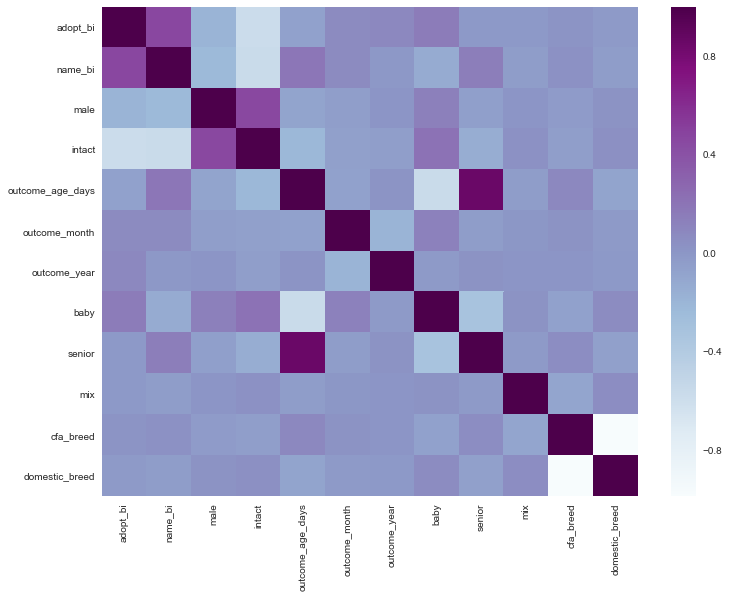

In [70]:
#Set up matplotlib
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(cat_df2.corr(), cmap='BuPu')

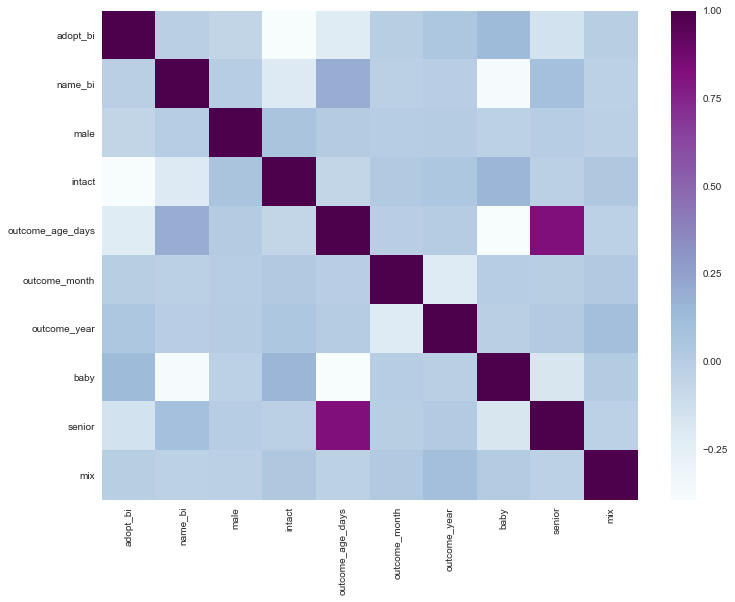

In [71]:
#Set up matplotlib
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(dog_df2.corr(), cmap='BuPu')

## Predicting adoption using a Decision Tree

### Cats

In [72]:
from sklearn import tree
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

In [73]:
X = cat_df2.drop(['outcome_type','adopt_bi','outcome_age_days','breed1','coat','domestic_breed','outcome_season',
                 'outcome_weekday'], 1)
y = cat_df2['adopt_bi']

decision_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

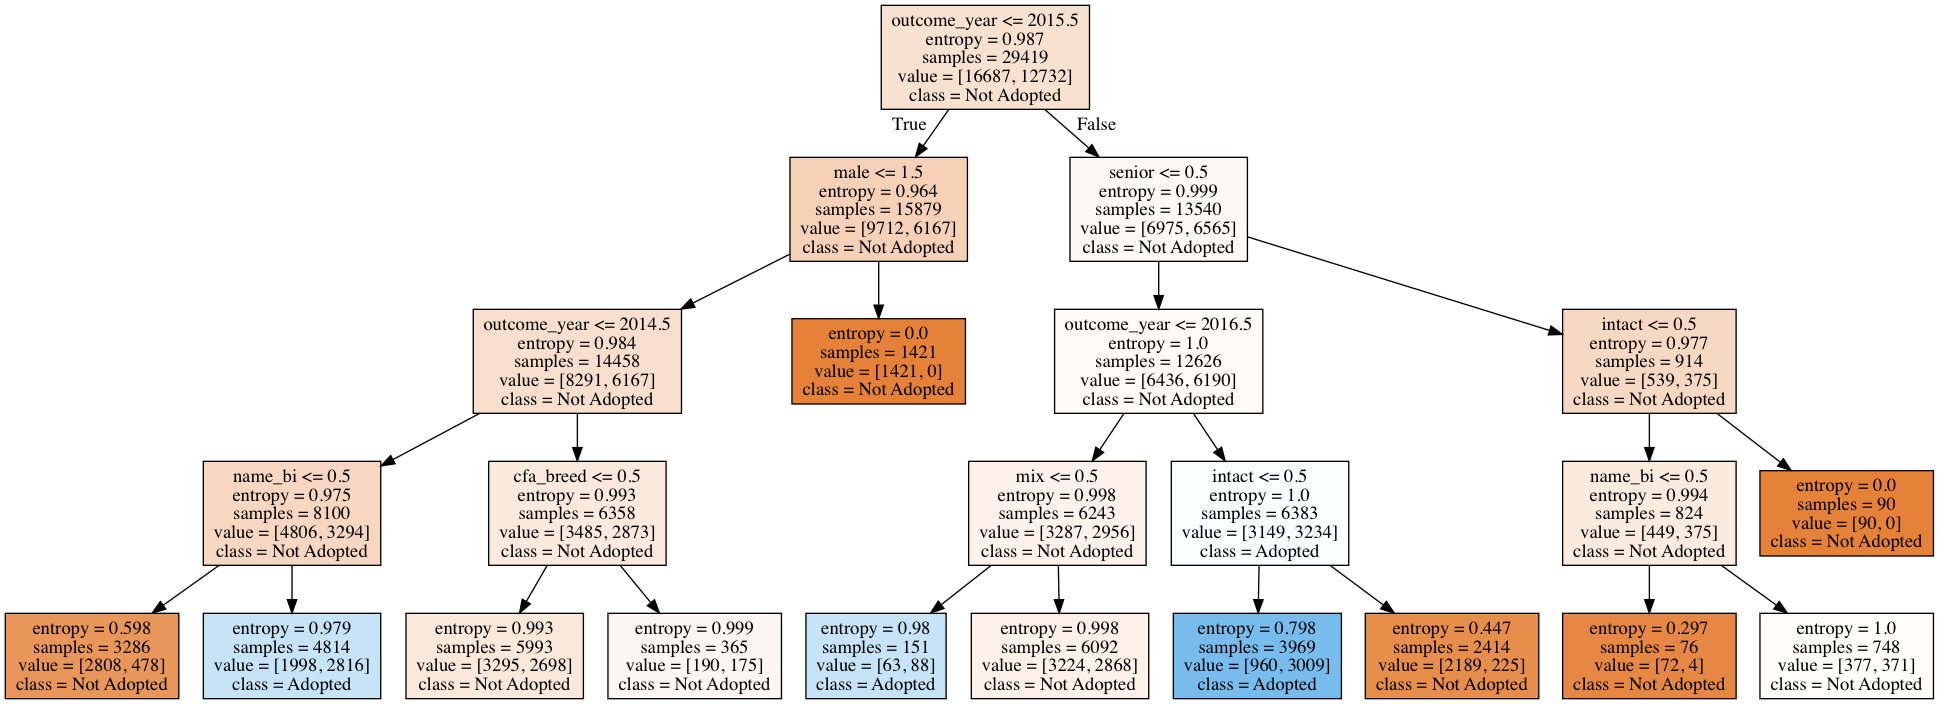

In [74]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Not Adopted', 'Adopted'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [75]:
X = dog_df2.drop(['outcome_type','adopt_bi','outcome_age_days','breed1','coat','outcome_season',
                 'outcome_weekday'], 1)
y = dog_df2['adopt_bi']

decision_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

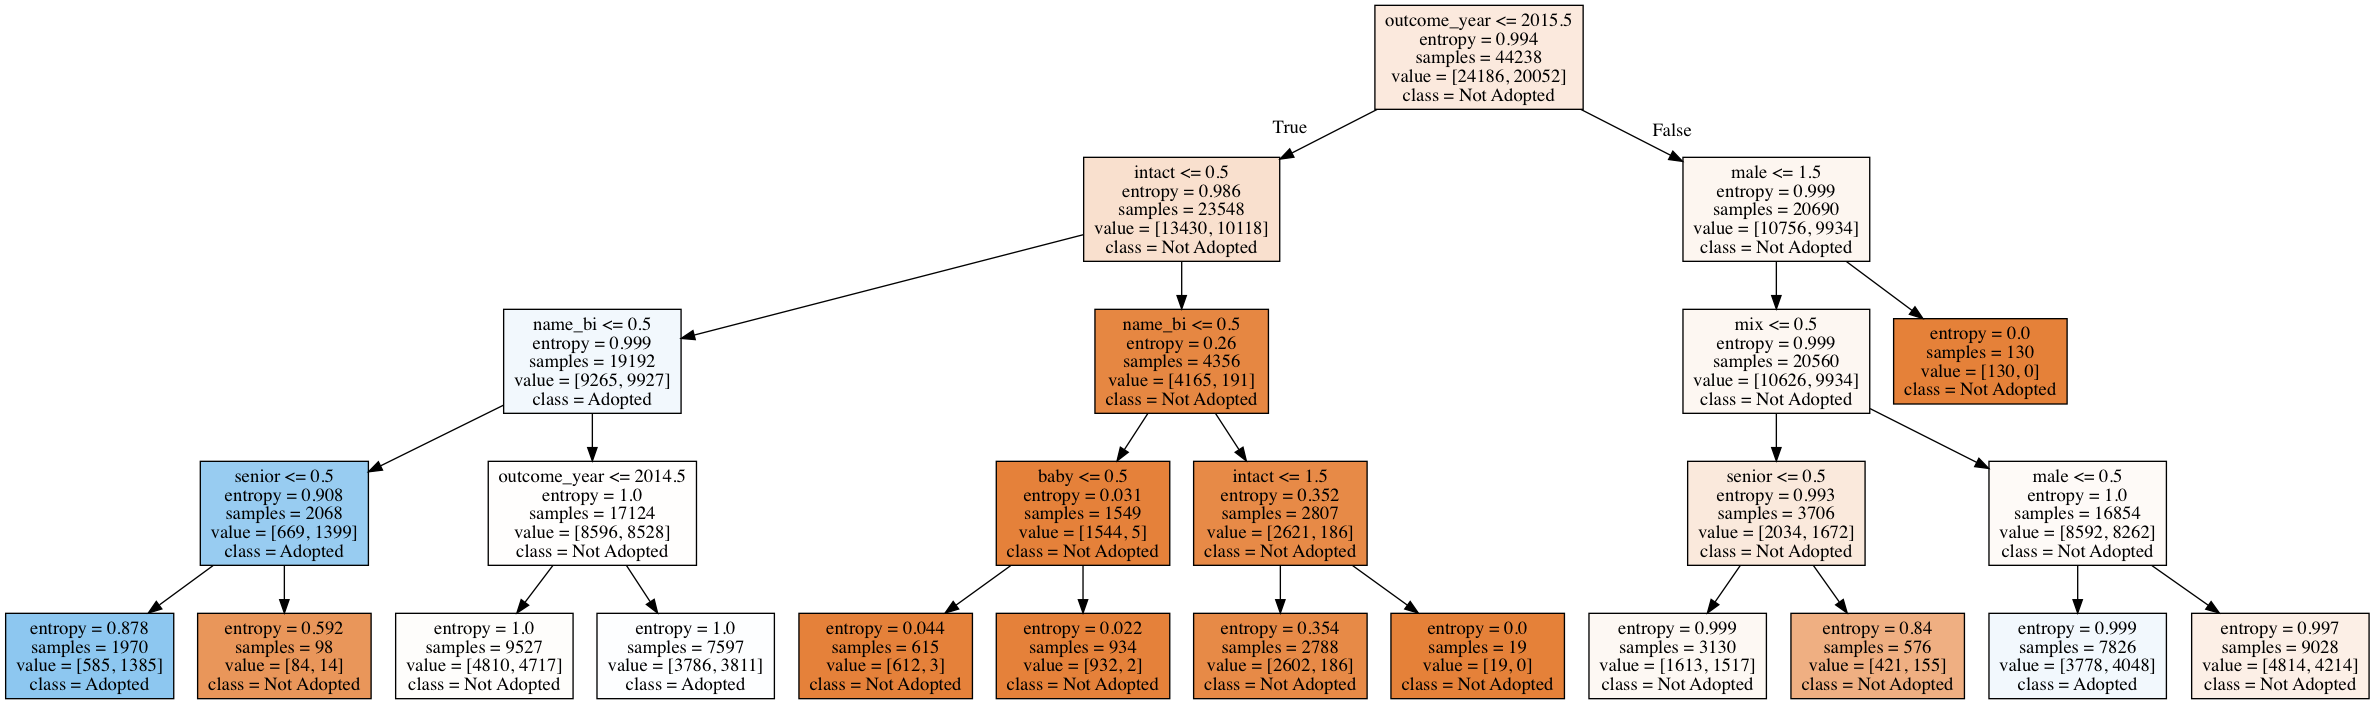

In [76]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Not Adopted', 'Adopted'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Predicting outcome using Random Forest
Let's see if we can use Random Forest to predict the outcomes of cats and dogs in the animal shelter.

### Cats

In [77]:
rfc = ensemble.RandomForestClassifier()
X = cat_df2.drop(['outcome_type','adopt_bi'], 1)
y = cat_df2['outcome_type']

# We need to get dummy variables for the categorical data
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

In [78]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
rfc.score(X_test, y_test)

0.75787446181735785

In [80]:
cross_val_score(rfc, X, y, cv=5)

array([ 0.73963995,  0.75110432,  0.76907392,  0.75714286,  0.76003401])

In [81]:
y_pred = rfc.fit(X_train, y_train).predict(X_train)

In [82]:
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer,All
True,,,,,,,,,
Adoption,8809,1,1,4,1,10,0,86,8912
Died,4,257,0,2,0,0,0,19,282
Disposal,0,0,8,0,0,0,0,3,11
Euthanasia,4,0,0,959,0,1,0,53,1017
Missing,2,0,0,0,17,0,0,1,20
Return to Owner,58,0,0,0,0,927,0,17,1002
Rto-Adopt,4,0,0,0,0,0,19,0,23
Transfer,169,4,0,12,1,18,0,9122,9326
All,9050,262,9,977,19,956,19,9301,20593


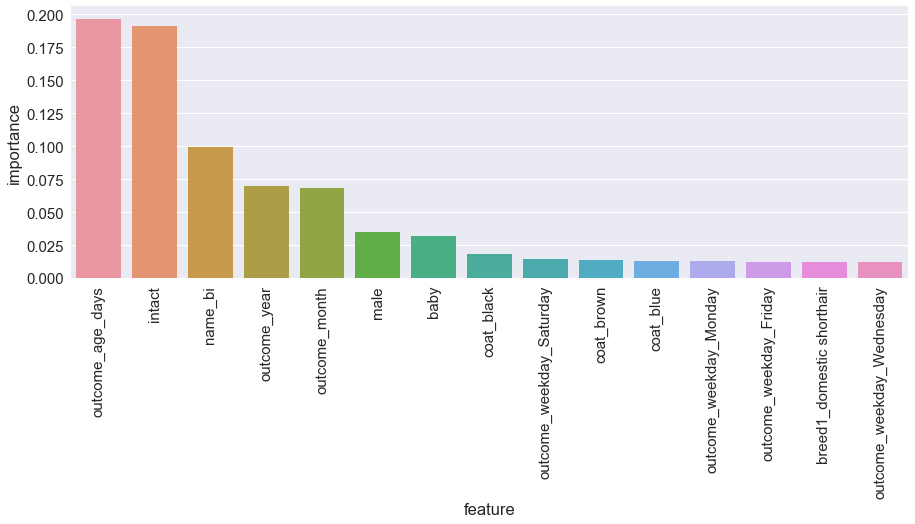

In [83]:
feature_importances = rfc.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': X.columns}, 
                           index=X.columns).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15])

### Dogs
Let's try it for dogs!

In [84]:
rfc = ensemble.RandomForestClassifier()
X = dog_df2.drop(['outcome_type','adopt_bi'], 1)
y = dog_df2['outcome_type']

# We need to get dummy variables for the categorical data
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
rfc.score(X_test, y_test)

0.57896323086196499

In [86]:
cross_val_score(rfc, X, y, cv=10)

array([ 0.57239666,  0.57307432,  0.58721193,  0.56552192,  0.5900565 ,
        0.57707957,  0.5840868 ,  0.57181633,  0.58452138,  0.58157954])

Hmm the dog model does considerably worse than the cat model.  My theory is it is because of the high 'Return to owner' outcome for dogs.  I would imagine none of the features (dog breed, dog age, outcome time of year, etc) are good predictors to whether or not a dog is returned to the owner.  Let's take a look at the confusion matrix to assess wither this theory is true or not.

In [87]:
y_pred = rfc.fit(X_train, y_train).predict(X_train)

In [88]:
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer,All
True,,,,,,,,,
Adoption,13939,0,0,3,0,60,0,34,14036
Died,1,92,0,0,0,2,0,2,97
Disposal,0,0,12,0,0,0,0,0,12
Euthanasia,21,0,0,1001,0,16,0,15,1053
Missing,1,0,0,0,11,0,0,0,12
Return to Owner,265,0,0,5,0,8717,0,25,9012
Rto-Adopt,6,0,0,0,0,1,74,1,82
Transfer,213,1,0,4,0,109,0,6335,6662
All,14446,93,12,1013,11,8905,74,6412,30966


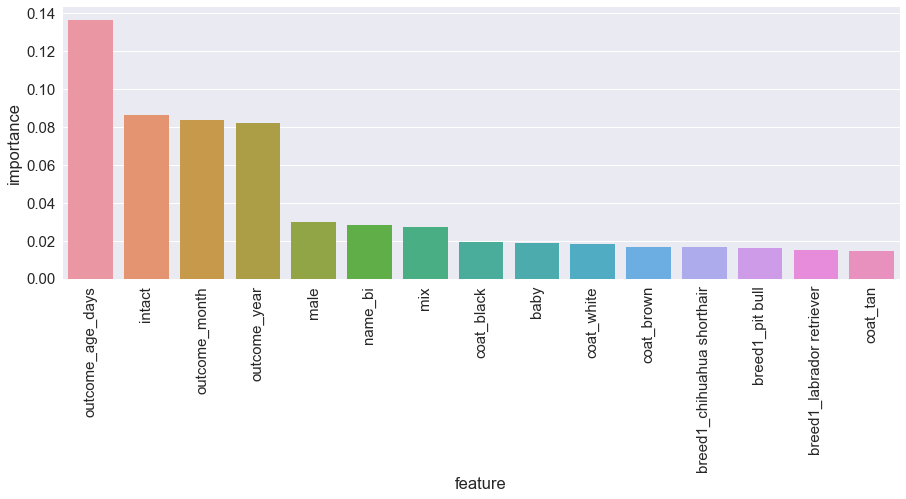

In [89]:
feature_importances = rfc.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': X.columns}, 
                           index=X.columns).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15])

These are features that are important to predicting the outcome of the animal.  

## Predicting Adoption using Random Forest
What if we just want to look at whether or not the animal is adopted, compared to all other outcomes.

### Cats

In [90]:
rfc = ensemble.RandomForestClassifier()
Xc = cat_df2.drop(['outcome_type','adopt_bi'], 1)
yc = cat_df2['adopt_bi']

# We need to get dummy variables for the categorical data
Xc = pd.get_dummies(Xc)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3,
                                                    random_state=0, stratify=yc)

rfc.fit(Xc_train, yc_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
rfc.score(Xc_test, yc_test)

0.84160435078178109

In [92]:
cross_val_score(rfc, Xc, yc, cv=5)

array([ 0.82259983,  0.84027188,  0.8563658 ,  0.84429713,  0.84701683])

In [93]:
yc_pred = rfc.fit(Xc_train, yc_train).predict(Xc_train)

In [94]:
conf_matrix = confusion_matrix(yc_train, yc_pred)
conf_matrix

array([[11543,   138],
       [  168,  8744]])

In [95]:
# Sensitivity of model: Percentage of positives correctly identified
print('The sensitivity is: ' + str(conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])))

# Specificity of the model: Percentage of negatives correctly identified
print('The specificity is: ' + str(conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])))

The sensitivity is: 0.981149012567
The specificity is: 0.988185942984


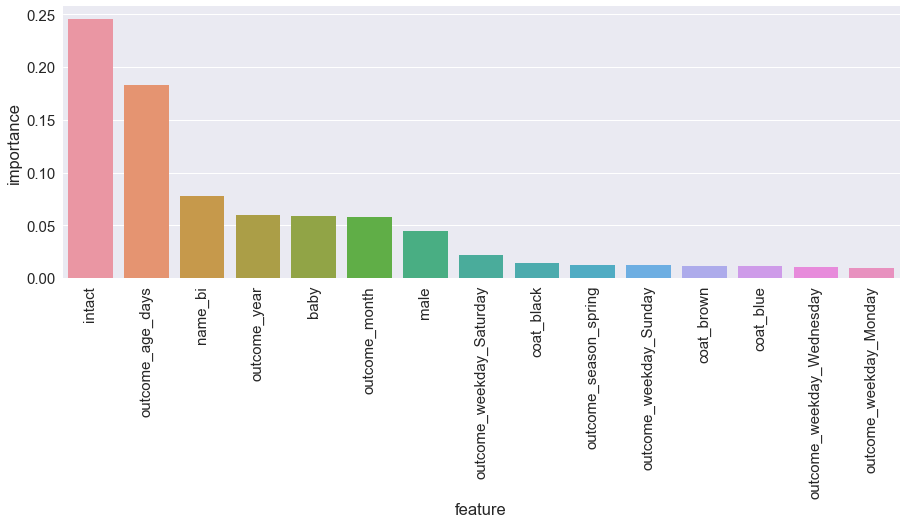

In [96]:
feature_importances = rfc.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': Xc.columns}, 
                           index=Xc.columns).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15])

In [97]:
rfc = ensemble.RandomForestClassifier()
Xd = dog_df2.drop(['outcome_type','adopt_bi'], 1)
yd = dog_df2['adopt_bi']

# We need to get dummy variables for the categorical data
Xd = pd.get_dummies(Xd)

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.3,
                                                    random_state=0, stratify=yd)

rfc.fit(Xd_train, yd_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
rfc.score(Xd_test, yd_test)

0.7057715491259795

In [99]:
cross_val_score(rfc, Xd, yd, cv=5)

array([ 0.67261837,  0.69394213,  0.70973211,  0.71617497,  0.70871482])

In [100]:
yd_pred = rfc.fit(Xd_train, yd_train).predict(Xd_train)

In [101]:
conf_matrix = confusion_matrix(yd_train, yd_pred)
conf_matrix

array([[16758,   172],
       [  436, 13600]])

In [102]:
# Sensitivity of model: Percentage of positives correctly identified
print('The sensitivity is: ' + str(conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])))

# Specificity of the model: Percentage of negatives correctly identified
print('The specificity is: ' + str(conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])))

The sensitivity is: 0.968937019094
The specificity is: 0.989840519787


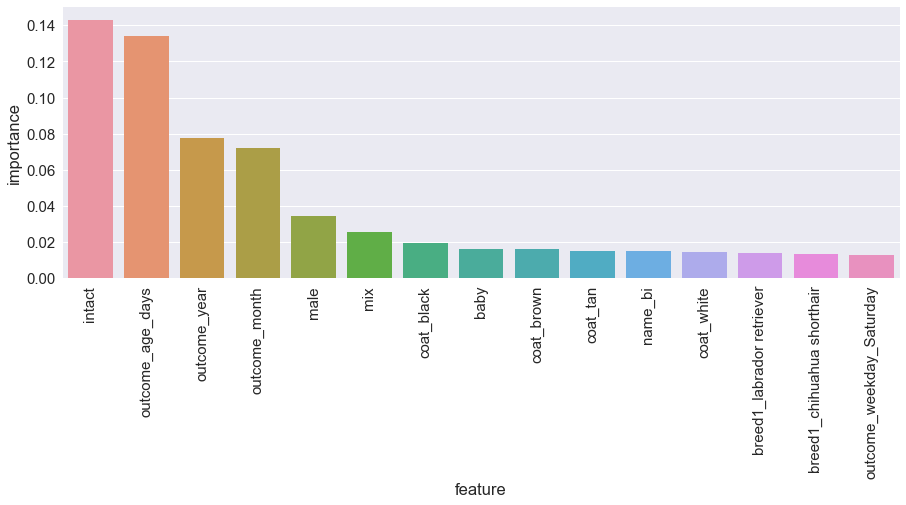

In [103]:
feature_importances = rfc.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': Xd.columns}, 
                           index=Xd.columns).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15])

## Support Vector Machine for predicting adoption

To reduce the run time for our support vector machine, we are going to use a label encoder to assign the different breeds and coats to a number, instead of using dummy variables.

In [84]:
columns = ['breed1','coat']

def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df

In [85]:
cat_df3 = encoder(cat_df2)
dog_df3 = encoder(dog_df2)

### Cats

In [86]:
Xc = cat_df3.drop(['outcome_type','adopt_bi'], 1)
yc = cat_df3['adopt_bi']

# We need to get dummy variables for the categorical data
Xc = pd.get_dummies(Xc)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3,
                                                    random_state=0, stratify=yc)

In [87]:
svc = SVC(C=1e-9, kernel='rbf')
svc.fit(Xc_train, yc_train)

SVC(C=1e-09, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
svc.score(Xc_test, yc_test)

0.56718785406752781

In [89]:
cross_val_score(svc, Xc, yc, cv=5)

array([ 0.56720476,  0.56720476,  0.5672276 ,  0.5672276 ,  0.5672276 ])

### Dogs

In [90]:
Xd = dog_df3.drop(['outcome_type','adopt_bi'], 1)
yd = dog_df3['adopt_bi']

# We need to get dummy variables for the categorical data
Xd = pd.get_dummies(Xd)

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.3,
                                                    random_state=0, stratify=yd)

In [94]:
svc = SVC(C=1e-9, kernel='rbf')
svc.fit(Xd_train, yd_train)

SVC(C=1e-09, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
svc.score(Xd_test, yd_test)

0.54671488848704042

In [96]:
cross_val_score(svc, Xd, yd, cv=5)

array([ 0.54672844,  0.54667722,  0.54673901,  0.54673901,  0.54673901])